## Notes 

Some ideas taken from [here](http://people.virginia.edu/~lz2n/mse6020/notes/D-partial-fcc.pdf) and from [here](http://www.slideshare.net/omaratefradwan/mse501-ch5-radwan).

Burgers vector of the lowest energy dislocation is 
$$
    b = \frac{a}{2} \langle 110 \rangle \qquad \Rightarrow\qquad  |b| = \frac{a}{\sqrt{2}}
$$
The next best option is 
$$
    b' = a \langle 001 \rangle \qquad \Rightarrow \qquad |b'| = a 
$$
(the latter is rarely observed!) 

The slip-plane for $b'$ dislocations are $\{111\}$ close packed planes stacked in ABCABC arrangement. 

But of course we can equivalently take $b \propto 101$ or $b \propto 011$. 



In [2]:
using PyPlot
using JuLIP
using JuLIP.ASE, JuLIP.Potentials, JuLIP.Constraints 

project12(x, E) = [dot(x, E[1]); dot(x, E[2])]

function basis_a12(at)
    F = defm(at)    
    a1, a2, a3 = F[:,1], F[:,2], F[:,3] 
    a1 /= vecnorm(a1); a2 /= vecnorm(a2); a3 /= vecnorm(a3)
    e1 = a1 
    e2 = a2 - dot(a1, a2) * a1; e2 /= vecnorm(e2) 
    e3 = e1 × e2
    return (e1, e2, e3)
end 

function pos2d(at)
    X = positions(at) 
    e1, e2, e3 = basis_a12(at)
    x = [dot(e1, x) for x in X]
    y = [dot(e2, x) for x in X]
    z = [ round(Int, dot(e3, x) / 2.08423) for x in X ]
    I0 = find(z .== 0)
    I1 = find(z .== 1)
    I2 = find(z .== 2)
    return [x'; y'], I0, I1, I2
end 

function plotfcc(P, I0, I1, I2; mrksz=20)
    plot(P[1,I0], P[2,I0], "b.", markersize=mrksz )
    plot(P[1,I1], P[2,I1], "r.", markersize=mrksz )
    plot(P[1,I2], P[2,I2], "g.", markersize=mrksz )
    axis("square")
end 



plotfcc (generic function with 1 method)

In [6]:
at = bulk("Cu")
F = defm(at)
a1, a2, a3 = F[:,1], F[:,2], F[:,3]
@show a1, a2, a3
# n = a1 × a2
# @show n 

(a1,a2,a3) = ([0.0,1.805,1.805],[1.805,0.0,1.805],[1.805,1.805,0.0])


([0.0,1.805,1.805],[1.805,0.0,1.805],[1.805,1.805,0.0])

In [5]:
at = bulk("Cu") * (7,7,3)
# JuLIP.Visualise.show(at)

JuLIP.ASE.ASEAtoms(PyObject Atoms(symbols='Cu147', positions=..., cell=[[0.0, 12.635, 12.635], [12.635, 0.0, 12.635], [5.415, 5.415, 0.0]], pbc=[True, True, True]),JuLIP.NullCalculator(),JuLIP.NullConstraint())

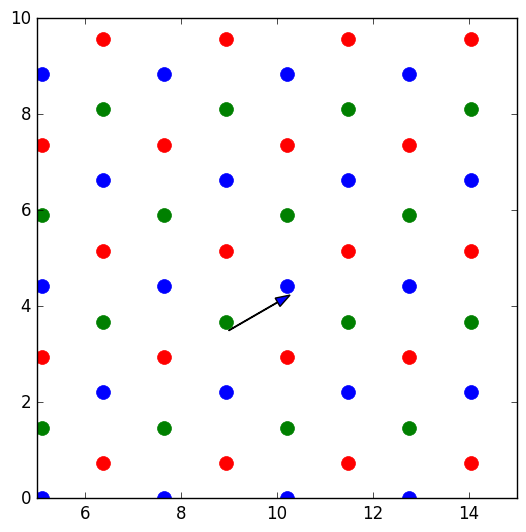

PyObject <matplotlib.patches.FancyArrow object at 0x32d52a890>

In [65]:
at = bulk("Cu") * (7,7,3)
P, I0, I1, I2 = pos2d(at)   # this projecs onto the plane spanned by a1, a2 
plotfcc(P, I0, I1, I2)
axis([5, 15, 0, 10]);
E = basis_a12(at) 
atu = bulk("Cu")
b = defm(atu)[:,3] 
b12 = project12(b, E)
arrow(9, 3.5, b12[1], b12[2], length_includes_head=true, width=0.01)



## How to generate domains